In [1]:
!pip install qiskit qiskit_aer matplotlib --upgrade
!pip install pylatexenc --upgrade

  Using cached pylatexenc-2.10-py3-none-any.whl


In [2]:
# Quantum Phase Estimation (QPE) using Qiskit 2.x

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

def qpe_circuit(num_count_qubits, theta):
    qc = QuantumCircuit(num_count_qubits + 1, num_count_qubits)

    # Step 1: Apply Hadamard gates on counting qubits
    qc.h(range(num_count_qubits))

    # Step 2: Prepare eigenstate (|1>) for the target qubit
    qc.x(num_count_qubits)

    # Step 3: Apply controlled unitary operations
    for qubit in range(num_count_qubits):
        qc.cp(2 * np.pi * theta * (2 ** qubit), qubit, num_count_qubits)

    # Step 4: Apply inverse QFT to counting qubits
    inverse_qft(qc, num_count_qubits)

    # Step 5: Measure counting qubits
    qc.measure(range(num_count_qubits), range(num_count_qubits))

    return qc


def inverse_qft(qc, n):
    """Apply the inverse Quantum Fourier Transform on n qubits."""
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    for j in range(n):
        for k in range(j):
            qc.cp(-np.pi / 2 ** (j - k), k, j)
        qc.h(j)
    return qc


def run_qpe(num_count_qubits, theta_list):
    """Executes the QPE circuit and visualizes the phase estimation result."""
    simulator = AerSimulator()
    for theta in theta_list:
      print("Running QPE with theta ={theta}")
      qc = qpe_circuit(num_count_qubits,theta)
      compiled_circuit = transpile(qc, simulator)
      result = simulator.run(compiled_circuit, shots=2048).result()
      counts = result.get_counts()
      plot_histogram(counts)
      plt.show()
      print(qc.draw(output='text'))

# Task 1
if __name__ == "__main__":
    num_count_qubits = 3
    theta_values = [0.25,0.375,0.5]
    run_qpe(num_count_qubits, theta_values)





Running QPE with theta ={theta}
     ┌───┐                           ┌───┐                                   »
q_0: ┤ H ├─■───────────────────────X─┤ H ├─■──────────────■──────────────────»
     ├───┤ │                       │ └───┘ │P(-π/2) ┌───┐ │                  »
q_1: ┤ H ├─┼────────■──────────────┼───────■────────┤ H ├─┼─────────■────────»
     ├───┤ │        │              │                └───┘ │P(-π/4)  │P(-π/2) »
q_2: ┤ H ├─┼────────┼──────■───────X──────────────────────■─────────■────────»
     ├───┤ │P(π/2)  │P(π)  │P(2π)                                            »
q_3: ┤ X ├─■────────■──────■─────────────────────────────────────────────────»
     └───┘                                                                   »
c: 3/════════════════════════════════════════════════════════════════════════»
                                                                             »
«     ┌─┐           
«q_0: ┤M├───────────
«     └╥┘     ┌─┐   
«q_1: ─╫──────┤M├───
«      ║ ┌───┐└

In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

def qpe_circuit(num_count_qubits, unitary, theta):
    qc = QuantumCircuit(num_count_qubits + 1, num_count_qubits)

    # Step 1: Apply Hadamard gates on counting qubits
    qc.h(range(num_count_qubits))

    # Step 2: Prepare eigenstate (|1>) for the target qubit
    qc.x(num_count_qubits)

    # Step 3: Apply controlled unitary operations
    for qubit in range(num_count_qubits):
        qc.cp(2 * np.pi * theta * (2 ** qubit), qubit, num_count_qubits)

    # Step 4: Apply inverse QFT to counting qubits
    inverse_qft(qc, num_count_qubits)

    # Step 5: Measure counting qubits
    qc.measure(range(num_count_qubits), range(num_count_qubits))

    return qc


def inverse_qft(qc, n):
    """Apply the inverse Quantum Fourier Transform on n qubits."""
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    for j in range(n):
        for k in range(j):
            qc.cp(-np.pi / 2 ** (j - k), k, j)
        qc.h(j)
    return qc


def run_qpe(num_count_qubits=5, theta=0.125):
    """Executes the QPE circuit and visualizes the phase estimation result."""
    simulator = AerSimulator()
    qc = qpe_circuit(num_count_qubits, "U", theta)
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=2048).result()
    counts = result.get_counts()
    plot_histogram(counts)
    plt.show()
    print(qc.draw(output='text'))

# Task 2
if __name__ == "__main__":
    num_count_qubits = 5
    theta = 0.125  # phase value (1/8)
    print(f"Running Quantum Phase Estimation with {num_count_qubits} counting qubits and phase {theta}")
    run_qpe(num_count_qubits, theta)





Running Quantum Phase Estimation with 5 counting qubits and phase 0.125
     ┌───┐                                            ┌───┐               »
q_0: ┤ H ├─■────────────────────────────────────────X─┤ H ├─■─────────────»
     ├───┤ │                                        │ └───┘ │P(-π/2) ┌───┐»
q_1: ┤ H ├─┼────────■─────────────────────────X─────┼───────■────────┤ H ├»
     ├───┤ │        │                         │     │                └───┘»
q_2: ┤ H ├─┼────────┼────────■────────────────┼─────┼─────────────────────»
     ├───┤ │        │        │                │     │                     »
q_3: ┤ H ├─┼────────┼────────┼──────■─────────X─────┼─────────────────────»
     ├───┤ │        │        │      │               │                     »
q_4: ┤ H ├─┼────────┼────────┼──────┼───────■───────X─────────────────────»
     ├───┤ │P(π/4)  │P(π/2)  │P(π)  │P(2π)  │P(4π)                        »
q_5: ┤ X ├─■────────■────────■──────■───────■─────────────────────────────»
     └───┘      

In [4]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

def theta_to_binary(theta, num_count_qubits):
    """Convert phase theta into a binary string with num_count_qubits bits."""
    binary_str = ""
    frac = theta
    for _ in range(num_count_qubits):
        frac *= 2
        if frac >= 1:
            binary_str += "1"
            frac -= 1
        else:
            binary_str += "0"
    return binary_str

def inverse_qft(qc, n):
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    for j in range(n):
        for k in range(j):
            qc.cp(-np.pi / 2 ** (j - k), k, j)
        qc.h(j)
    return qc


def qpe_circuit(num_count_qubits, theta):
    qc = QuantumCircuit(num_count_qubits + 1, num_count_qubits)
    qc.h(range(num_count_qubits))
    qc.x(num_count_qubits)
    for qubit in range(num_count_qubits):
        qc.cp(2 * np.pi * theta * (2 ** qubit), qubit, num_count_qubits)
    inverse_qft(qc, num_count_qubits)
    qc.measure(range(num_count_qubits), range(num_count_qubits))
    return qc
# Task 3
def run_qpe(num_count_qubits, theta):
    simulator = AerSimulator()

    print(f"\n=== Running Quantum Phase Estimation ===")
    print(f"Number of counting qubits: {num_count_qubits}")
    print(f"Phase value (theta): {theta}\n")

    qc = qpe_circuit(num_count_qubits, theta)
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=2048).result()
    counts = result.get_counts()

    print("Quantum Circuit:")
    print(qc.draw(output='text'))

    expected_binary = theta_to_binary(theta, num_count_qubits)
    plot_histogram(counts, title=f"Theta = {theta} (Expected: {expected_binary})")
    plt.show()

    print(f"Theoretical expected output (binary): {expected_binary}")
    most_probable = max(counts, key=counts.get)
    print(f"Most probable measured output: {most_probable}\n")

if __name__ == "__main__":
    num_count_qubits = 3
    theta_value = 0.125
    run_qpe(num_count_qubits, theta_value)



=== Running Quantum Phase Estimation ===
Number of counting qubits: 3
Phase value (theta): 0.125

Quantum Circuit:
     ┌───┐                            ┌───┐                                   »
q_0: ┤ H ├─■────────────────────────X─┤ H ├─■──────────────■──────────────────»
     ├───┤ │                        │ └───┘ │P(-π/2) ┌───┐ │                  »
q_1: ┤ H ├─┼────────■───────────────┼───────■────────┤ H ├─┼─────────■────────»
     ├───┤ │        │               │                └───┘ │P(-π/4)  │P(-π/2) »
q_2: ┤ H ├─┼────────┼────────■──────X──────────────────────■─────────■────────»
     ├───┤ │P(π/4)  │P(π/2)  │P(π)                                            »
q_3: ┤ X ├─■────────■────────■────────────────────────────────────────────────»
     └───┘                                                                    »
c: 3/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«   

Running Quantum Phase Estimation with 3 counting qubits and phase 0.125
Inverse QFT (inside QPE) visualization:


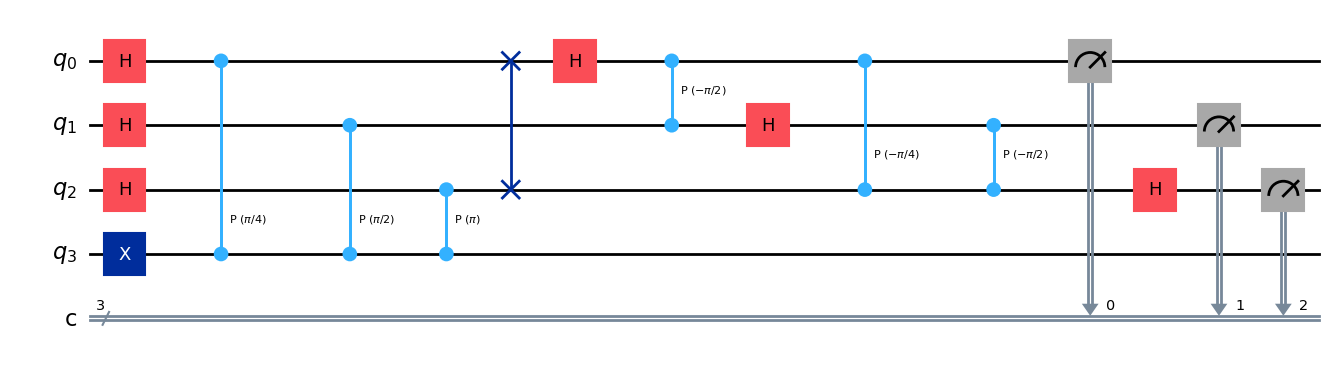

     ┌───┐                            ┌───┐                                   »
q_0: ┤ H ├─■────────────────────────X─┤ H ├─■──────────────■──────────────────»
     ├───┤ │                        │ └───┘ │P(-π/2) ┌───┐ │                  »
q_1: ┤ H ├─┼────────■───────────────┼───────■────────┤ H ├─┼─────────■────────»
     ├───┤ │        │               │                └───┘ │P(-π/4)  │P(-π/2) »
q_2: ┤ H ├─┼────────┼────────■──────X──────────────────────■─────────■────────»
     ├───┤ │P(π/4)  │P(π/2)  │P(π)                                            »
q_3: ┤ X ├─■────────■────────■────────────────────────────────────────────────»
     └───┘                                                                    »
c: 3/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«     ┌─┐           
«q_0: ┤M├───────────
«     └╥┘     ┌─┐   
«q_1: ─╫──────┤M├───
«      ║ ┌───┐└╥┘┌─┐
«q_2: ─╫─┤ H ├─

In [13]:
%matplotlib inline
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

def qpe_circuit(num_count_qubits, unitary, theta):
    qc = QuantumCircuit(num_count_qubits + 1, num_count_qubits)

    # Step 1: Apply Hadamard gates on counting qubits
    qc.h(range(num_count_qubits))

    # Step 2: Prepare eigenstate (|1>) for the target qubit
    qc.x(num_count_qubits)

    # Step 3: Apply controlled unitary operations
    for qubit in range(num_count_qubits):
        qc.cp(2 * np.pi * theta * (2 ** qubit), qubit, num_count_qubits)

    # Step 4: Apply inverse QFT to counting qubits
    inverse_qft(qc, num_count_qubits)

    # Step 5: Measure counting qubits
    qc.measure(range(num_count_qubits), range(num_count_qubits))

    return qc

def inverse_qft(qc, n):
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    for j in range(n):
        for k in range(j):
            qc.cp(-np.pi / 2 ** (j - k), k, j)
        qc.h(j)
    return qc

def run_qpe(num_count_qubits=3, theta=0.125):
    simulator = AerSimulator()
    qc = qpe_circuit(num_count_qubits, "U", theta)

    # Task 4
    print("Inverse QFT (inside QPE) visualization:")
    display(qc.draw(output='mpl'))
    plt.show()

    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=2048).result()
    counts = result.get_counts()
    plot_histogram(counts)
    plt.show()

    print(qc.draw(output='text'))

if __name__ == "__main__":
    num_count_qubits = 3
    theta = 0.125
    print(f"Running Quantum Phase Estimation with {num_count_qubits} counting qubits and phase {theta}")
    run_qpe(num_count_qubits, theta)


In [15]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

from qiskit_aer.noise import NoiseModel, depolarizing_error

def qpe_circuit(num_count_qubits, unitary, theta):
    qc = QuantumCircuit(num_count_qubits + 1, num_count_qubits)

    qc.h(range(num_count_qubits))
    qc.x(num_count_qubits)

    for qubit in range(num_count_qubits):
        qc.cp(2 * np.pi * theta * (2 ** qubit), qubit, num_count_qubits)

    inverse_qft(qc, num_count_qubits)
    qc.measure(range(num_count_qubits), range(num_count_qubits))

    return qc

def inverse_qft(qc, n):
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    for j in range(n):
        for k in range(j):
            qc.cp(-np.pi / 2 ** (j - k), k, j)
        qc.h(j)
    return qc


def run_qpe(num_count_qubits=3, theta=0.125):
    ideal_sim = AerSimulator()

    # Task 5
    noise_model = NoiseModel()
    one_qubit_noise = depolarizing_error(0.02, 1)
    two_qubit_noise = depolarizing_error(0.05, 2)

    noise_model.add_all_qubit_quantum_error(one_qubit_noise, ["h", "x"])
    noise_model.add_all_qubit_quantum_error(two_qubit_noise, ["cp"])

    noisy_sim = AerSimulator(noise_model=noise_model)

    qc = qpe_circuit(num_count_qubits, "U", theta)

    compiled_ideal = transpile(qc, ideal_sim)
    result_ideal = ideal_sim.run(compiled_ideal, shots=2048).result()
    counts_ideal = result_ideal.get_counts()

    compiled_noisy = transpile(qc, noisy_sim)
    result_noisy = noisy_sim.run(compiled_noisy, shots=2048).result()
    counts_noisy = result_noisy.get_counts()

    print("Ideal (Noiseless) Result:")
    plot_histogram(counts_ideal)
    plt.show()

    print("Noisy Result (Depolarizing Noise Added):")
    plot_histogram(counts_noisy)
    plt.show()

    print("\nCircuit (text format):")
    print(qc.draw(output='text'))


if __name__ == "__main__":
    num_count_qubits = 3
    theta = 0.125
    print(f"Running QPE with {num_count_qubits} counting qubits and phase {theta}")
    run_qpe(num_count_qubits, theta)


Running QPE with 3 counting qubits and phase 0.125
Ideal (Noiseless) Result:
Noisy Result (Depolarizing Noise Added):

Circuit (text format):
     ┌───┐                            ┌───┐                                   »
q_0: ┤ H ├─■────────────────────────X─┤ H ├─■──────────────■──────────────────»
     ├───┤ │                        │ └───┘ │P(-π/2) ┌───┐ │                  »
q_1: ┤ H ├─┼────────■───────────────┼───────■────────┤ H ├─┼─────────■────────»
     ├───┤ │        │               │                └───┘ │P(-π/4)  │P(-π/2) »
q_2: ┤ H ├─┼────────┼────────■──────X──────────────────────■─────────■────────»
     ├───┤ │P(π/4)  │P(π/2)  │P(π)                                            »
q_3: ┤ X ├─■────────■────────■────────────────────────────────────────────────»
     └───┘                                                                    »
c: 3/═════════════════════════════════════════════════════════════════════════»
                                                          